In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sb
import numpy as np
from scipy import stats



print(os.listdir("/Users/geraldine/Documents/IDS/DATASET/datathree"))

['new_data_test.csv', 'new_data_train.csv']


In [3]:
pd.options.display.max_columns = None

In [4]:
train=pd.read_csv("/Users/geraldine/Documents/IDS/DATASET/datathree/new_data_train.csv", index_col = 0)
train.head()

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,508,508,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Dos
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Dos
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,4,1.0,1.0,0.0,0.0,0.03,0.09,0.0,255,4,0.02,0.1,0.0,0.0,1.0,1.0,0.0,0.0,Dos
3,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Dos
4,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Dos


In [5]:
test=pd.read_csv("/Users/geraldine/Documents/IDS/DATASET/datathree/new_data_test.csv", index_col = 0)
test.head()

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,Dos
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,Dos
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,268,11,1.0,1.0,0.0,0.0,0.04,0.06,0.0,255,11,0.04,0.08,0.0,0.0,1.0,1.0,0.0,0.0,Dos
3,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122,13,1.0,1.0,0.0,0.0,0.11,0.07,0.0,255,13,0.05,0.06,0.0,0.0,1.0,1.0,0.0,0.0,Dos
4,0,icmp,ecr_i,SF,520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,Dos


## Conversion de attack

Convertirmos las palabras de attack en numeros, donde Normal toma el valor numerico de 0, Dos, R2L, U2R y Probe toma el valor númerico de 1

In [6]:
cat_to_nums = {'attack':  {'Normal': 0, 'Dos': 1, 'R2L':1, 'U2R':1, 'Probe':1}}
train.replace(cat_to_nums, inplace = True)
test.replace(cat_to_nums, inplace = True)

In [7]:
cat_to_nums

{'attack': {'Normal': 0, 'Dos': 1, 'R2L': 1, 'U2R': 1, 'Probe': 1}}

In [8]:
train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,508,508,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,4,1.0,1.0,0.0,0.0,0.03,0.09,0.0,255,4,0.02,0.1,0.0,0.0,1.0,1.0,0.0,0.0,1
3,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


De lo anterior convertimos los tipos de ataque en ataque o no ataque, esto con el fin de hace una reduccion y simplificar nuestro analisis para el objetivo que buscamos

## Mapa de calor con nuestro target

Text(0.5, 1, 'MAPA DE CORRELACIONES')

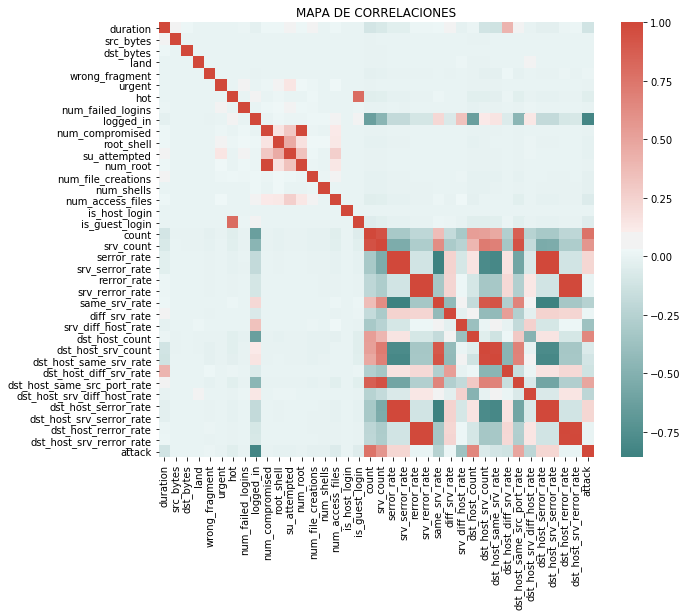

In [11]:
f,ax = plt.subplots(figsize=(10, 8)) 
corr = train.corr() 
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(550, 15, as_cmap=True), square=True, ax=ax) 
plt.title("MAPA DE CORRELACIONES")

Del anterior mapa de calor, podemos observar que las variables num_root esta fuertemente correlacionada con num_comprised, esto nos indica que una podría ser ignorada para el analisis. Se procedió a elegir la variable a ser ignorada de acuerdo a la correlación que tengan con la variable objetivo, es decir la variable attack.

Ambas variables estan de igual correlación con la variable attack.

Del anterior mapa de calor, podemos observar que las variables serror_rate esta fuertemente correlacionada con srv_serror_rate, esto nos indica que una podría ser ignorada para el analisis. Se procedió a elegir las variables a ser ignoradas de acuerdo a la correlación que tengan con la variable objetivo, es decir la variable attack. Por tantno se eliminaran.

## Reduccion de data redundante

In [9]:
train.drop('num_root', axis = 1, inplace = True)

In [21]:
test.drop('num_root', axis = 1, inplace = True)

In [10]:
train.drop('srv_serror_rate', axis = 1, inplace = True)

In [22]:
test.drop('srv_serror_rate', axis = 1, inplace = True)

In [11]:
train.drop('srv_rerror_rate', axis = 1, inplace = True)

In [23]:
test.drop('srv_rerror_rate', axis = 1, inplace = True)

In [12]:
train.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

In [24]:
test.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

In [13]:
train.drop('dst_host_serror_rate', axis = 1, inplace = True)

In [25]:
test.drop('dst_host_serror_rate', axis = 1, inplace = True)

In [14]:
train.drop('dst_host_rerror_rate', axis = 1, inplace = True) 

In [26]:
test.drop('dst_host_rerror_rate', axis = 1, inplace = True) 

In [15]:
train.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True) 

In [27]:
test.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True) 

In [16]:
train.drop('dst_host_same_srv_rate', axis = 1, inplace = True)

In [28]:
test.drop('dst_host_same_srv_rate', axis = 1, inplace = True)

In [19]:
train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,508,508,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,4,1.0,0.0,0.03,0.09,0.0,255,4,0.1,0.0,0.0,1
3,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1
4,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1


In [29]:
test.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.0,0.0,1
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.0,0.0,1
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,268,11,1.0,0.0,0.04,0.06,0.0,255,11,0.08,0.0,0.0,1
3,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122,13,1.0,0.0,0.11,0.07,0.0,255,13,0.06,0.0,0.0,1
4,0,icmp,ecr_i,SF,520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.0,0.0,1


In [20]:
train.shape

(3428901, 33)

In [30]:
test.shape

(1469529, 33)

In [17]:
train.to_csv("/Users/geraldine/Documents/IDS/DATASET/datafour/new_data_train.csv")

In [31]:
test.to_csv("/Users/geraldine/Documents/IDS/DATASET/datafour/new_data_test.csv")